In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vtk_rw import read_vtk
from ply_rw import read_ply
import lmfit
import pandas as pd
import scipy.stats as stats
from plotting import plot_surf_stat_map, crop_img

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
colors = sns.color_palette('cubehelix', 10)

### Functions

In [4]:
def custom_plot(x, y, res, xlabel=None, ylabel=None, data_color=colors[1]):
    fig=plt.figure(figsize=(12,5))
    fig.add_subplot(121)
    plt.plot(x, y, alpha=0.1, marker='.', linestyle='None', color=data_color)
    plt.plot(x, res.best_fit, color='black', linestyle='None', marker='.', markersize=.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig.add_subplot(122)
    res.plot_residuals(data_kws={'alpha':0.1, 'color':'grey', 'marker':'.'}, fit_kws={'color':'k', 'linewidth':2})
    
def custom_report(res):
    print 'BIC', res.bic
    print 'AIC', res.aic
    
def fit_simple(model, x, y, xlabel, ylabel, color):
    
    pars = model.guess(y, x=x)
    out = model.fit(y, pars, x=x)
    
    custom_report(out)
    custom_plot(x,y, out, xlabel=xlabel, ylabel=ylabel, data_color=color)
    
    return out


def fit_composite_const(model, x, y, xlabel, ylabel, color):
    
    const_model = lmfit.models.LinearModel(prefix='const_')
    const_model.set_param_hint(name='slope', value=0, vary=False)
    comp_model = model + const_model
    
    pars = const_model.make_params(intercept=y.min())
    pars += model.guess(y, x=x)
    out = comp_model.fit(y, pars, x=x)
    
    custom_report(out)
    custom_plot(x,y, out, xlabel=xlabel, ylabel=ylabel, data_color=color)
    
    return out

In [5]:
def plot_side(data, v, f, sulc, hemi):
    sns.set_style('white')
    
    
    if hemi == 'right':
        lat=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                            elev=180,azim=0, figsize=(11,10.5) ,threshold=1e-50, cmap='jet') 

        sns.set_style('white')
        med=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True,darkness=0.5,
                elev=180,azim=180, figsize=(11,10.5), threshold=1e-50, cmap='jet')

        lat_crop=crop_img(lat)
        med_crop=crop_img(med)

        fig=plt.figure()
        fig.set_size_inches(16, 8)
        ax1 = fig.add_subplot(121)
        plt.imshow(lat_crop)
        ax1.set_axis_off()
        ax2 = fig.add_subplot(122)
        plt.imshow(med_crop)
        ax2.set_axis_off()
        
        
    elif hemi == 'left':
        lat=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                            elev=180,azim=0, figsize=(11,9) ,threshold=1e-50, cmap='jet') 

        sns.set_style('white')
        med=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True,darkness=0.5,
                elev=180,azim=180, figsize=(11,9), threshold=1e-50, cmap='jet')

        lat_crop=crop_img(lat)
        med_crop=crop_img(med)

        fig=plt.figure()
        fig.set_size_inches(16, 8)
        ax1 = fig.add_subplot(121)
        plt.imshow(lat_crop)
        ax1.set_axis_off()
        ax2 = fig.add_subplot(122)
        plt.imshow(med_crop)
        ax2.set_axis_off()
        
def plot_inflated(data, v, f, sulc, hemi, thr=1e-50):
    sns.set_style('white')
    
    
    if hemi == 'right':
        lat=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                            elev=180,azim=0, figsize=(10,7) ,threshold=thr, cmap='jet') 

        sns.set_style('white')
        med=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True,darkness=0.5,
                elev=180,azim=180, figsize=(10,7), threshold=thr, cmap='jet')

        lat_crop=crop_img(lat)
        med_crop=crop_img(med)

        fig=plt.figure()
        fig.set_size_inches(16, 8)
        ax1 = fig.add_subplot(121)
        plt.imshow(lat_crop)
        ax1.set_axis_off()
        ax2 = fig.add_subplot(122)
        plt.imshow(med_crop)
        ax2.set_axis_off()
        
        
    elif hemi == 'left':
        lat=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                            elev=180,azim=0, figsize=(10,7) ,threshold=thr, cmap='jet') 

        sns.set_style('white')
        med=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True,darkness=0.5,
                elev=180,azim=180, figsize=(10,7), threshold=thr, cmap='jet')

        lat_crop=crop_img(lat)
        med_crop=crop_img(med)

        fig=plt.figure()
        fig.set_size_inches(16, 8)
        ax1 = fig.add_subplot(121)
        plt.imshow(lat_crop)
        ax1.set_axis_off()
        ax2 = fig.add_subplot(122)
        plt.imshow(med_crop)
        ax2.set_axis_off()

### Load data

In [6]:
lh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/lh_lowres_new.vtk'
lh_mesh_infl_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_infl200.vtk'
lh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/lh_sulc.npy'
lh_mask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/lh_fullmask.npy'
lh_myethick_file = '/scr/ilz3/myelinconnect/new_groupavg/myethick/myethick/smooth_3/lh_myethick_smooth_3.npy'
lh_myeratio_file = '/scr/ilz3/myelinconnect/new_groupavg/myethick/myeratio/smooth_3/lh_myeratio_smooth_3.npy'
lh_t1_file = '/scr/ilz3/myelinconnect/new_groupavg/t1/smooth_3/lh_t1_avg_smooth_3.npy'
lh_embed_file = '/scr/ilz3/myelinconnect/new_groupavg/embed/lh_smooth_3_embed.npy'

rh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/rh_lowres_new.vtk'
rh_mesh_infl_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_infl200.vtk'
rh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/rh_sulc.npy'
rh_mask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/rh_fullmask.npy'
rh_myethick_file = '/scr/ilz3/myelinconnect/new_groupavg/myethick/myethick/smooth_3/rh_myethick_smooth_3.npy'
rh_myeratio_file = '/scr/ilz3/myelinconnect/new_groupavg/myethick/myeratio/smooth_3/rh_myeratio_smooth_3.npy'
rh_t1_file = '/scr/ilz3/myelinconnect/new_groupavg/t1/smooth_3/rh_t1_avg_smooth_3.npy'
rh_embed_file = '/scr/ilz3/myelinconnect/new_groupavg/embed/rh_smooth_3_embed.npy'

In [7]:
lv,lf,ld = read_vtk(lh_mesh_file)
lv_infl, lf_infl, ld_infl = read_vtk(lh_mesh_infl_file)
lh_mask = np.load(lh_mask_file)
lh_myethick = np.load(lh_myethick_file)
lh_myeratio = np.load(lh_myeratio_file)
lh_t1 = np.load(lh_t1_file)
lh_sulc = np.load(lh_sulc_file)
lh_embed = np.load(lh_embed_file)

rv,rf,rd = read_vtk(rh_mesh_file)
rv_infl, rf_infl, rd_infl = read_vtk(rh_mesh_infl_file)
rh_mask = np.load(rh_mask_file)
rh_myethick = np.load(rh_myethick_file)
rh_myeratio = np.load(rh_myeratio_file)
rh_t1 = np.load(rh_t1_file)
rh_sulc = np.load(rh_sulc_file)
rh_embed = np.load(rh_embed_file)

### Mask

In [8]:
# extend mask to nodes that have a t1avg < 1500
rh_mask = np.unique(np.concatenate((rh_mask,np.where(rh_t1<=1500)[0])))
lh_mask = np.unique(np.concatenate((lh_mask,np.where(lh_t1<=1500)[0])))

In [9]:
rh_myethick[rh_mask]=0
rh_myeratio[rh_mask]=0
rh_t1[rh_mask] = 0
rh_embed[rh_mask] = 0

lh_myethick[lh_mask]=0
lh_myeratio[lh_mask]=0
lh_t1[lh_mask] = 0
lh_embed[lh_mask] = 0

In [10]:
rh_scatter_myethick = np.delete(rh_myethick, rh_mask)
rh_scatter_myeratio = np.delete(rh_myeratio, rh_mask)
rh_scatter_t1 = np.delete(rh_t1, rh_mask)
rh_scatter_embed = np.delete(rh_embed, rh_mask, axis=0)

lh_scatter_myethick = np.delete(lh_myethick, lh_mask)
lh_scatter_myeratio = np.delete(lh_myeratio, lh_mask)
lh_scatter_embed = np.delete(lh_embed, lh_mask, axis=0)
lh_scatter_t1 = np.delete(lh_t1, lh_mask)

### Normalize data to get sensible model comparison

In [11]:
lh_t1_norm = (lh_scatter_t1 - np.mean(lh_scatter_t1)) / (np.std(lh_scatter_t1))
lh_myethick_norm = (lh_scatter_myethick - np.mean(lh_scatter_myethick)) / (np.std(lh_scatter_myethick))
lh_myeratio_norm = (lh_scatter_myeratio - np.mean(lh_scatter_myeratio)) / (np.std(lh_scatter_myeratio))
lh_embed_norm = np.zeros_like(lh_scatter_embed)
for comp in range(lh_scatter_embed.shape[1]):
    lh_embed_norm[:,comp] = (lh_scatter_embed[:,comp] - np.mean(lh_scatter_embed[:,comp])) / (np.std(lh_scatter_embed[:,comp]))

rh_t1_norm = (rh_scatter_t1 - np.mean(rh_scatter_t1)) / (np.std(rh_scatter_t1))
rh_myethick_norm = (rh_scatter_myethick - np.mean(rh_scatter_myethick)) / (np.std(rh_scatter_myethick))
rh_myeratio_norm = (rh_scatter_myeratio - np.mean(rh_scatter_myeratio)) / (np.std(rh_scatter_myeratio))
rh_embed_norm = np.zeros_like(rh_scatter_embed)
for comp in range(rh_scatter_embed.shape[1]):
    rh_embed_norm[:,comp] = (rh_scatter_embed[:,comp] - np.mean(rh_scatter_embed[:,comp])) / (np.std(rh_scatter_embed[:,comp]))

### Choose data

In [12]:
ydata= lh_t1_norm
xdata = lh_embed_norm
ylabel = 'T1'
xlabel = 'FC map 1'
ydata_cortex = lh_t1
xdata_cortex = lh_embed
mask = lh_mask
vertices = lv_infl
faces = lf_infl
sulc= lh_sulc
hemi='left'

### Model

BIC -19021.558346
AIC -19039.642525


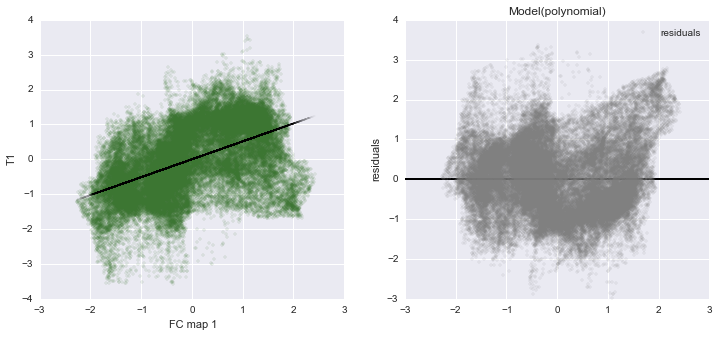

In [13]:
sns.set_style('darkgrid')
poly1_mod = lmfit.models.PolynomialModel(degree=1)

poly1_t1 = fit_simple(poly1_mod, 
                        x=xdata[:,0], y=ydata,
                        xlabel=xlabel,
                        ylabel=ylabel, 
                        color=colors[3])

BIC -23148.5994494
AIC -23175.7257179


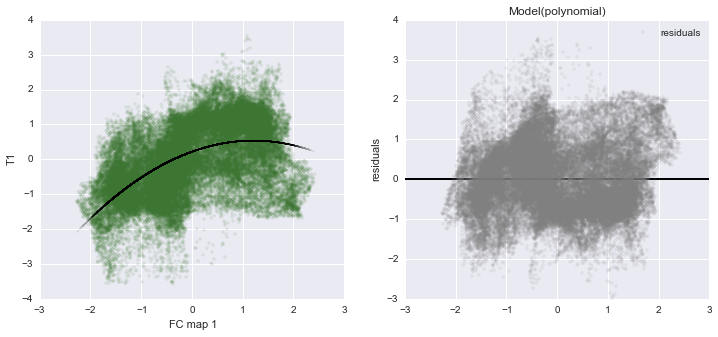

In [14]:
sns.set_style('darkgrid')
poly2_mod = lmfit.models.PolynomialModel(degree=2)

poly2_t1 = fit_simple(poly2_mod, 
                        x=xdata[:,0], y=ydata,
                        xlabel=xlabel,
                        ylabel=ylabel, 
                        color=colors[3])

BIC -28349.7572263
AIC -28385.9255843


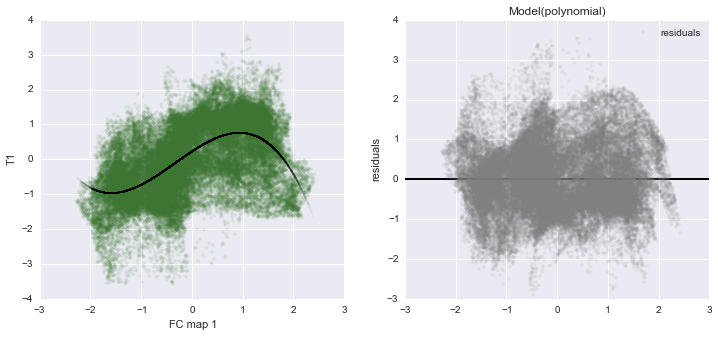

In [15]:
poly3_mod = lmfit.models.PolynomialModel(degree=3)

poly3_t1 = fit_simple(poly3_mod, 
                        x=xdata[:,0], y=ydata,
                        xlabel=xlabel,
                        ylabel=ylabel, 
                        color=colors[3])

In [16]:
print 'degree 1', stats.pearsonr(poly1_t1.best_fit, ydata)[0]
print 'degree 2', stats.pearsonr(poly2_t1.best_fit, ydata)[0]
print 'degree 3', stats.pearsonr(poly3_t1.best_fit, ydata)[0]

degree 1 0.512703473659
degree 2 0.556900847706
degree 3 0.604475250386


In [31]:
idcs=np.arange(0,ydata_cortex.shape[0])
nonmask=np.delete(idcs, mask)

In [32]:
poly1_norm = (poly1_t1.best_fit - np.mean(poly1_t1.best_fit))/np.std(poly1_t1.best_fit)
predicted_poly1 = np.zeros_like(ydata_cortex)
predicted_poly1[nonmask] = poly1_norm

poly2_norm = (poly2_t1.best_fit - np.mean(poly2_t1.best_fit))/np.std(poly2_t1.best_fit)
predicted_poly2 = np.zeros_like(ydata_cortex)
predicted_poly2[nonmask] = poly2_norm

poly3_norm = (poly3_t1.best_fit - np.mean(poly3_t1.best_fit))/np.std(poly3_t1.best_fit)
predicted_poly3 = np.zeros_like(ydata_cortex)
predicted_poly3[nonmask] = poly3_norm

orig = np.zeros_like(ydata_cortex)
orig[nonmask] = ydata
orig_embed = np.zeros_like(ydata_cortex)
orig_embed[nonmask] = xdata[:,0]

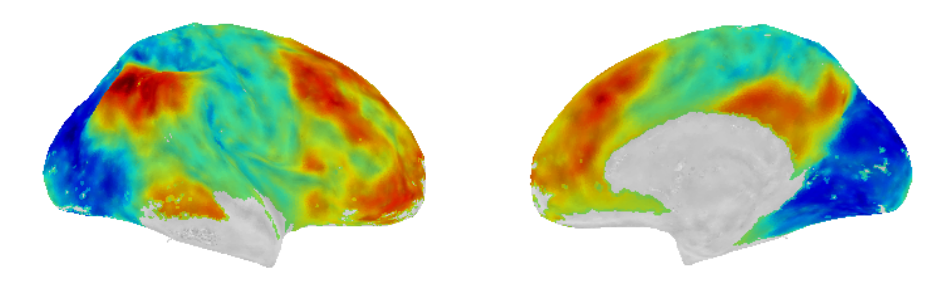

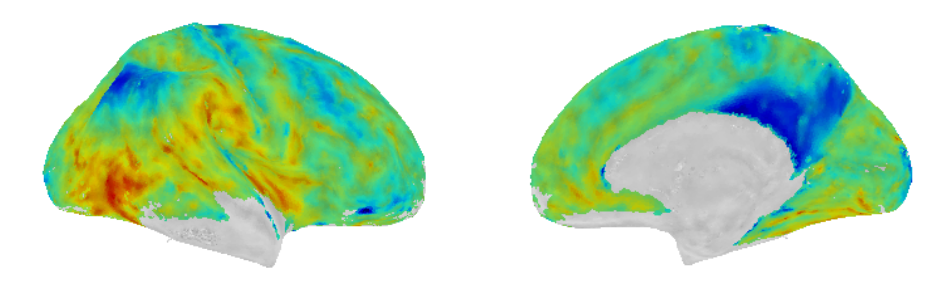

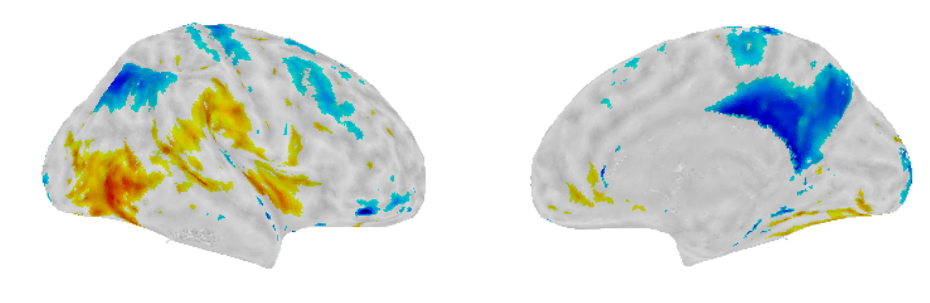

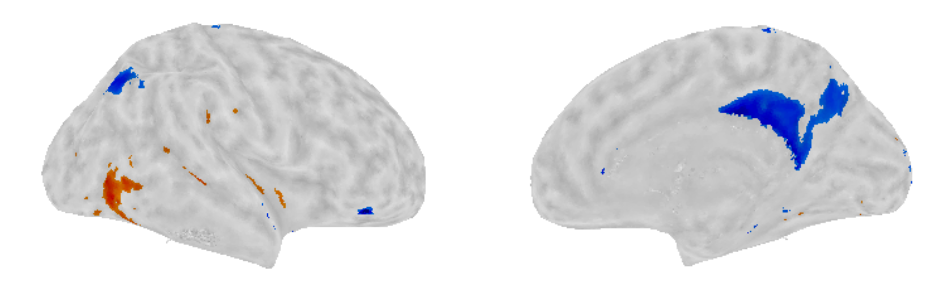

In [33]:
#plot_inflated(orig, vertices, faces, sulc, hemi)
plot_inflated(orig_embed, vertices, faces, sulc, hemi)
plot_inflated((orig-orig_embed), vertices, faces, sulc, hemi)
plot_inflated((orig-orig_embed), vertices, faces, sulc, hemi, thr=1)
plot_inflated((orig-orig_embed), vertices, faces, sulc, hemi, thr=2)

In [ ]:
for toplot in [predicted_poly1]:#, predicted_poly2,  predicted_poly3]:
    plot_inflated(toplot, vertices, faces, sulc, hemi)
    plot_inflated((orig-toplot), vertices, faces, sulc, hemi)
    plot_inflated((orig-toplot), vertices, faces, sulc, hemi, thr=1)
    plot_inflated((orig-toplot), vertices, faces, sulc, hemi, thr=2)

KeyboardInterrupt: 

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 370, in execute_request
    use

### Linear combination

In [45]:
from sklearn import linear_model
import scipy.stats as stats
maps = [0,4,5,6]
clf = linear_model.LinearRegression()
clf.fit(xdata[:,maps], ydata)
modelled_fit = np.dot(xdata[:,maps],clf.coef_)
print 'coeffs', clf.coef_
print 'rsquare', clf.score(xdata[:,maps], ydata)
print 'corr', stats.pearsonr(modelled_fit, ydata)[0]

coeffs [ 0.56060365  0.22775049  0.29542493 -0.36335661]
rsquare 0.586786482504
corr 0.766019896938


In [46]:
fit_norm = (modelled_fit - np.mean(modelled_fit)) / np.std(modelled_fit)
plot_fit = np.zeros_like(ydata_cortex)
plot_fit[nonmask] = fit_norm

In [47]:
t1_plot = np.zeros_like(ydata_cortex)
t1_plot[nonmask] = ydata

res_plot = np.zeros_like(ydata_cortex)
res_plot[nonmask] = ydata-fit_norm

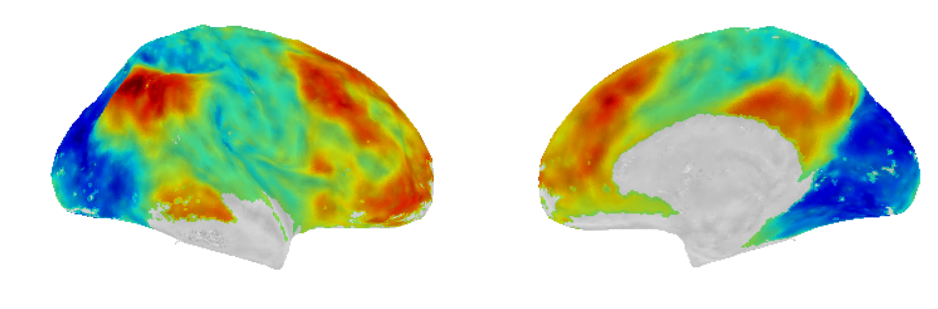

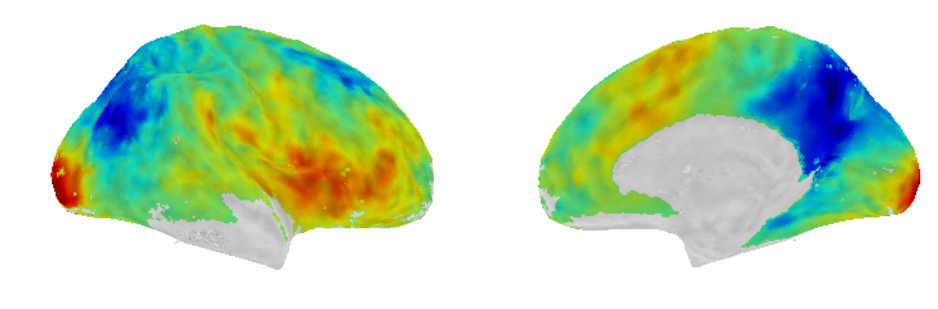

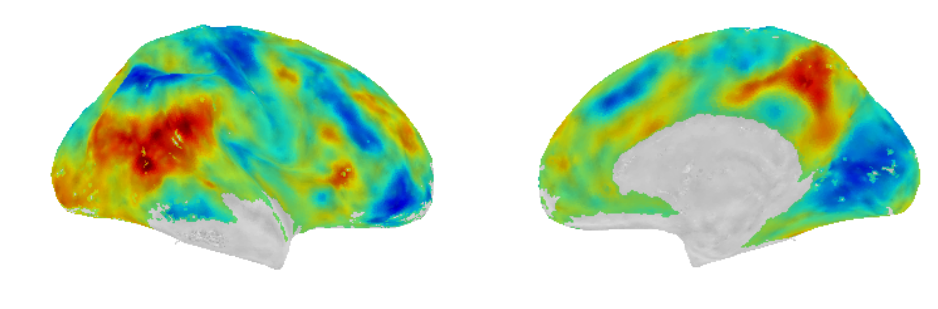

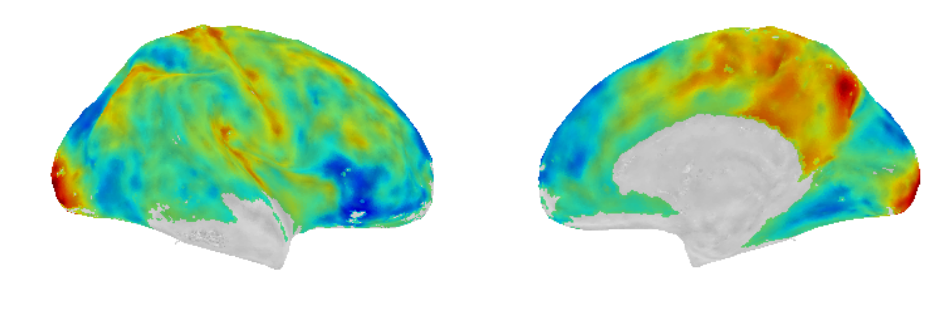

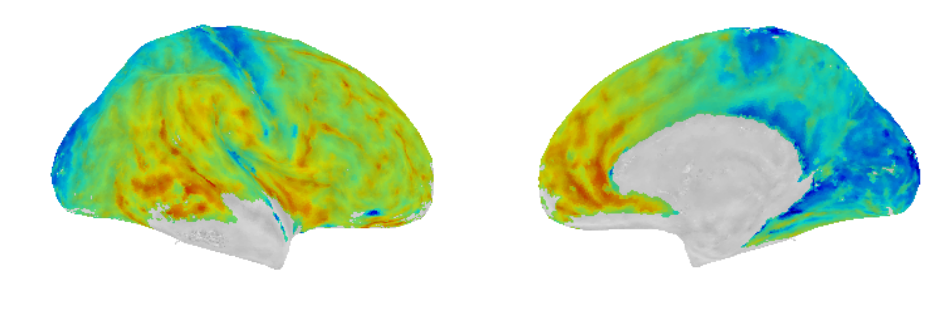

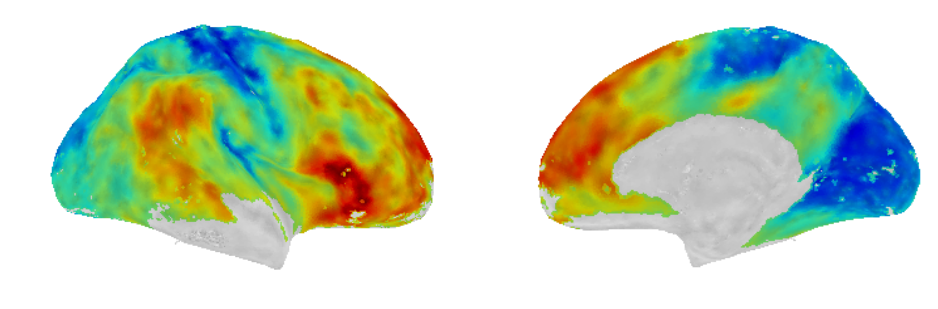

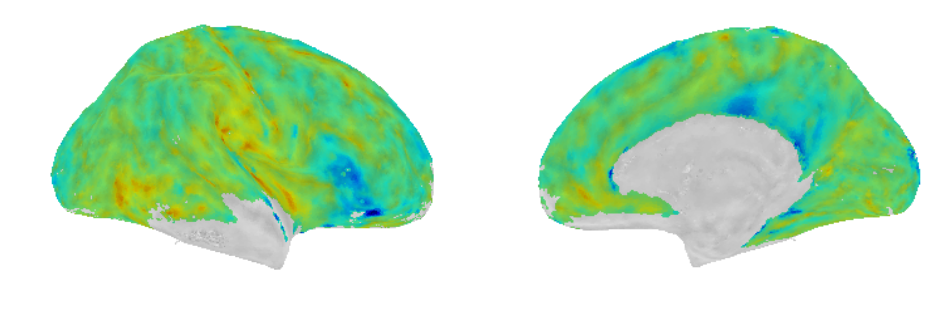

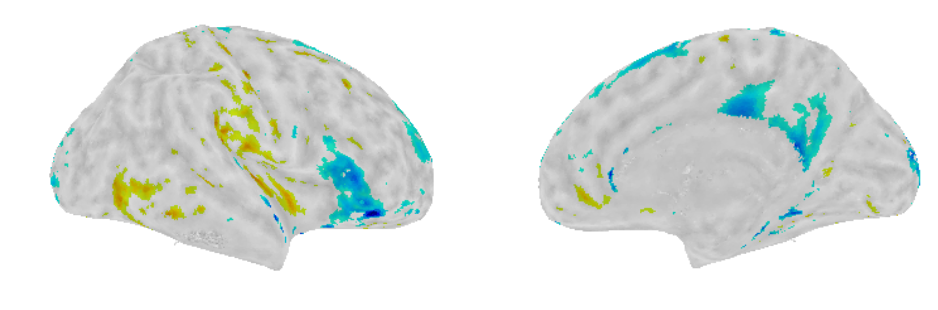

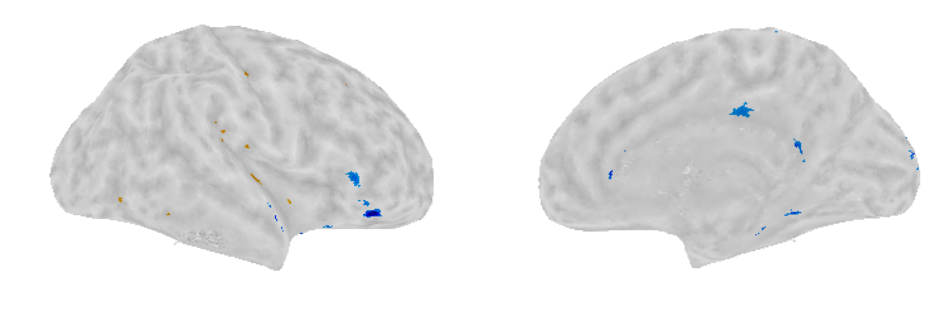

In [60]:
for toplot in [xdata_cortex[:,0], xdata_cortex[:,4], xdata_cortex[:,5], xdata_cortex[:,6],
               t1_plot, plot_fit, res_plot]:
    plot_inflated(toplot, vertices, faces, sulc, hemi)

plot_inflated(res_plot, vertices, faces, sulc, hemi, thr=1)
plot_inflated(res_plot, vertices, faces, sulc, hemi, thr=2)

### Distribution of modelled and predicted values

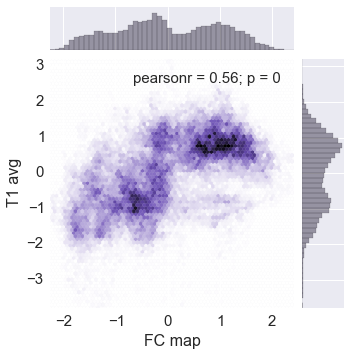

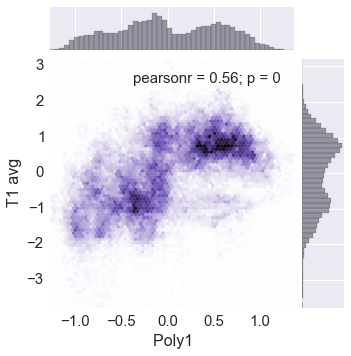

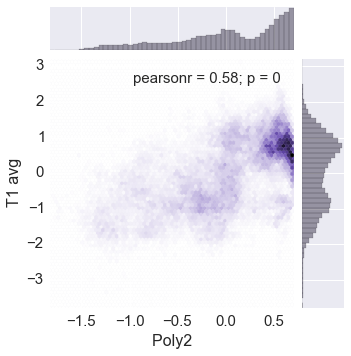

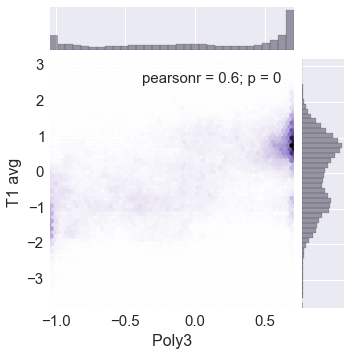

In [49]:
sns.set_style('darkgrid')
g = sns.jointplot(xdata[:,0], ydata, kind="hex", size=5, color=colors[0])
g.set_axis_labels('FC map ', 'T1 avg', fontsize=16)

sns.set_style('darkgrid')
g = sns.jointplot(poly1_t1.best_fit, ydata, kind="hex", size=5, color=colors[0])
g.set_axis_labels('Poly1 ', 'T1 avg', fontsize=16)

sns.set_style('darkgrid')
g = sns.jointplot(poly2_t1.best_fit, ydata, kind="hex", size=5, color=colors[0])
g.set_axis_labels('Poly2 ', 'T1 avg', fontsize=16)

sns.set_style('darkgrid')
g = sns.jointplot(poly3_t1.best_fit, ydata, kind="hex", size=5, color=colors[0])
g.set_axis_labels('Poly3 ', 'T1 avg', fontsize=16)

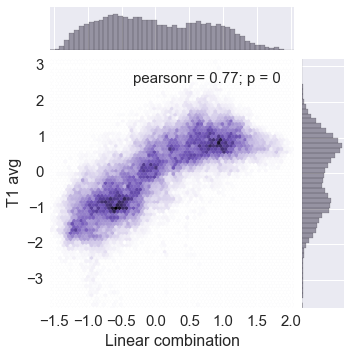

In [50]:
sns.set_style('darkgrid')
g = sns.jointplot(modelled_fit, ydata, kind="hex", size=5, color=colors[0])
g.set_axis_labels('Linear combination ', 'T1 avg', fontsize=16)

### Modelling random data

In [51]:
_,_,random_normal = read_vtk('/scr/ilz3/myelinconnect/new_groupavg/model/random_data/smooth_20/rh_random_normal_smoothdata.vtk')

In [52]:
random_normal_norm = np.delete(random_normal, mask)
random_normal_norm = (random_normal_norm - np.mean(random_normal_norm)) / np.std(random_normal_norm)

In [53]:
clf.fit(xdata[:,maps], random_normal_norm)
random_fit = np.dot(xdata[:,maps],clf.coef_)
print 'coeffs', clf.coef_
print 'rsquare', clf.score(xdata[:,maps], random_normal_norm)
print 'corr', stats.pearsonr(random_fit, random_normal_norm)[0]

coeffs [-0.2151937   0.32698985 -0.15377025  0.08544291]
rsquare 0.183936484727
corr 0.428878170028


In [54]:
random_normal_plot = np.zeros_like(ydata_cortex)
random_normal_plot[nonmask] = random_normal_norm

In [55]:
random_fit_norm = random_fit - np.mean(random_fit) / np.std(random_fit)
random_fit_plot = np.zeros_like(ydata_cortex)
random_fit_plot[nonmask] = random_fit_norm

In [56]:
random_res_plot = np.zeros_like(ydata_cortex)
random_res_plot[nonmask] = random_normal_norm - random_fit_norm

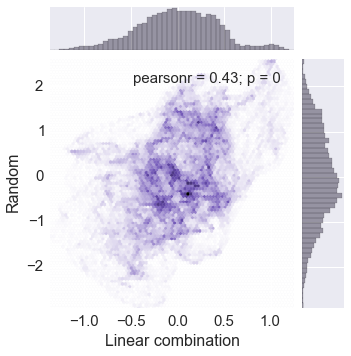

In [57]:
sns.set_style('darkgrid')
g = sns.jointplot(random_fit, random_normal_norm, kind="hex", size=5, color=colors[0])
g.set_axis_labels('Linear combination ', 'Random', fontsize=16)

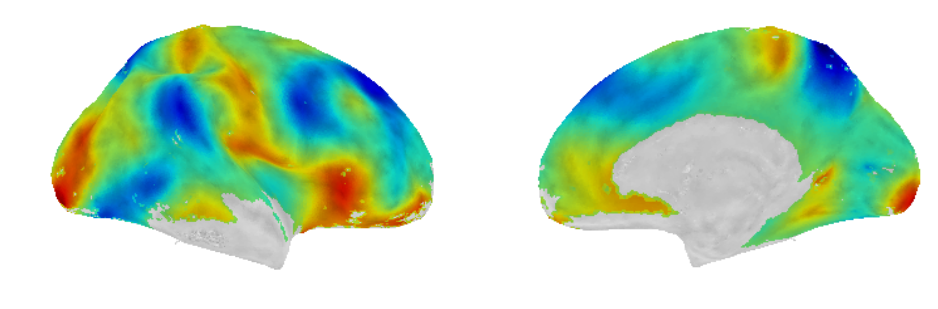

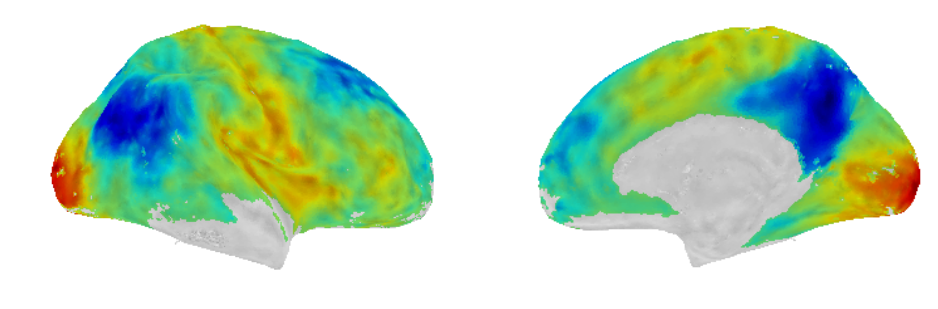

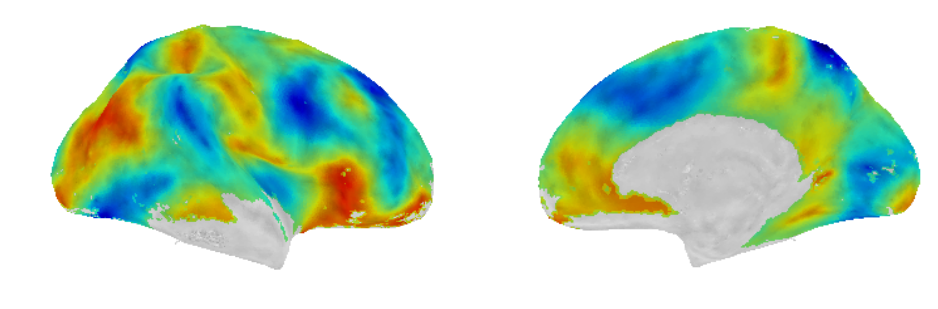

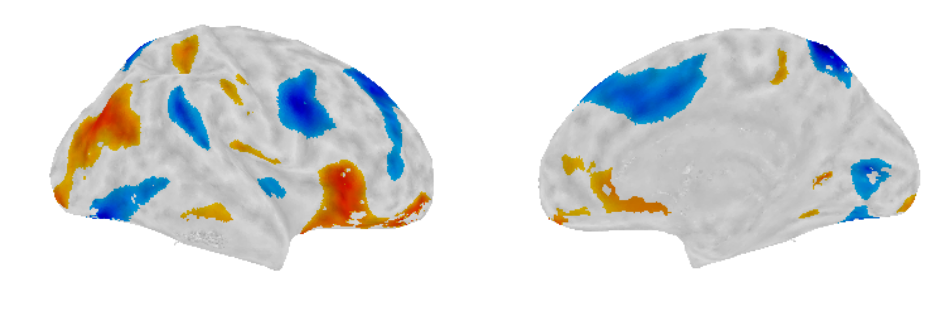

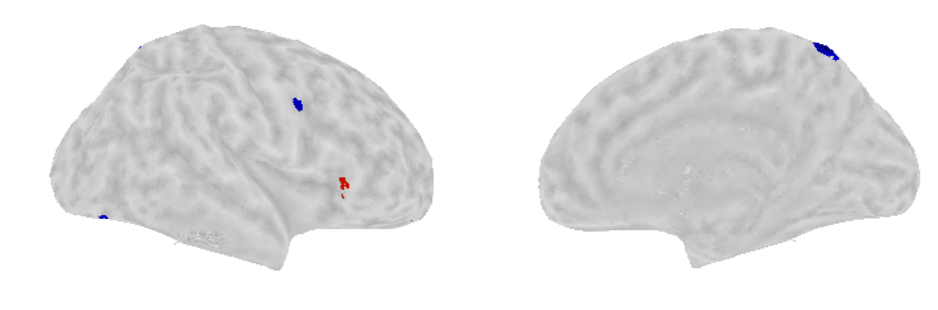

In [61]:
plot_inflated(random_normal_plot, vertices, faces, sulc, hemi)
plot_inflated(random_fit_plot, vertices, faces, sulc, hemi)
plot_inflated(random_res_plot, vertices, faces, sulc, hemi)
plot_inflated(random_res_plot, vertices, faces, sulc, hemi, thr=1)
plot_inflated(random_res_plot, vertices, faces, sulc, hemi, thr=2)